### Evolution of pharmaceutical stocks during COVID Crisis

## Import Librairies

In [ ]:
import pandas as pd
import urllib, json
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime as dt
!pip install yfinance
import yfinance as yf

## Download Data from Yahoo finance

In [ ]:
startdate=dt(2020,1,1)
enddate=dt(2020,12,31)

tickers=['PFE','AAPL','MSFT']
all_data= yf.download( tickers = tickers, period = "10y")


# On reset l'index du dataframe pour avoir une nos dates dans une colonne
all_data.reset_index(level=0, inplace=True)
all_data.head(5)

[*********************100%***********************]  3 of 3 completed


Date  Adj Close             ...     Volume                     
                   AAPL       MSFT  ...       AAPL       MSFT       PFE
0 2011-08-15  11.757218  20.441450  ...  460544000   56529400  53775502
1 2011-08-16  11.667371  20.441452  ...  498750000   54251500  45084955
2 2011-08-17  11.666145  20.360809  ...  442061200   50923700  47358750
3 2011-08-18  11.224875  19.893110  ...  851435200  105714200  77886489
4 2011-08-19  10.917614  19.393167  ...  775888400   77397900  59438222

[5 rows x 19 columns]

In [ ]:
##data process : on ajoute la date sous format année-mois pour une meilleure lisibilité sur nos graphs
all_data['short_date']=all_data['Date'] ## Ajout de la colonne
all_data['short_date'] = all_data['short_date'].dt.strftime('%Y-%m') ## Formattage

## Get the close price of the 8 stocks and create our dynamic visualization

In [ ]:
## Visualisation Dynamique de l'évolution du prix des 8 stocks sur cette période (graphique chandelle)

cdl = go.Figure()

for companyName in all_data['Open']:
    cdl.add_trace(go.Candlestick(
                    x=all_data['Date'],
                    open=all_data['Open'][companyName],
                    high=all_data['High'][companyName],
                    low=all_data['Low'][companyName],
                    close=all_data['Close'][companyName],
                    name=companyName
                    ))
cdl.show()

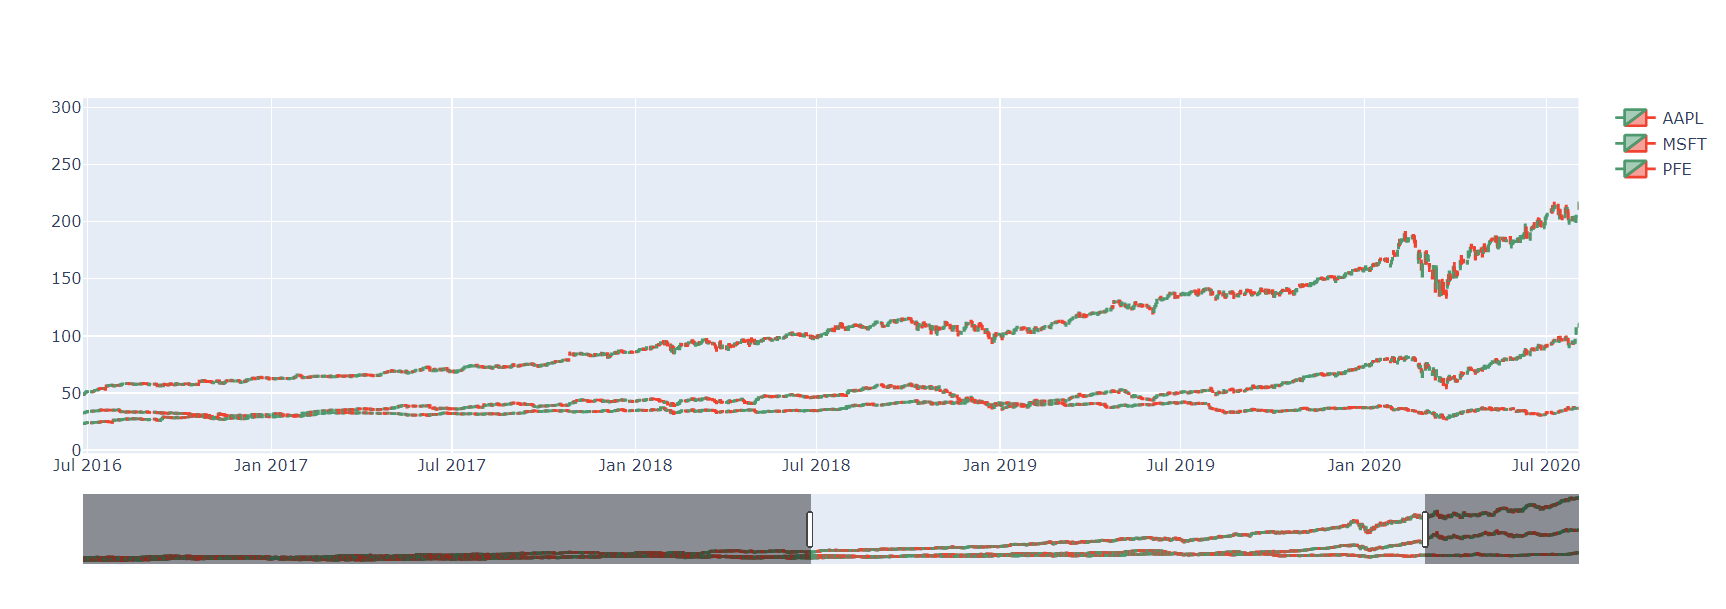

## Get the volume of the 8 stocks and create our dynamic visualization

In [ ]:
hist = go.Figure()

for companyName in all_data['Open']:
    hist.add_trace(go.Histogram(histfunc="sum", y=all_data["Volume"][companyName], x=all_data['short_date'], name=companyName))

hist.show()

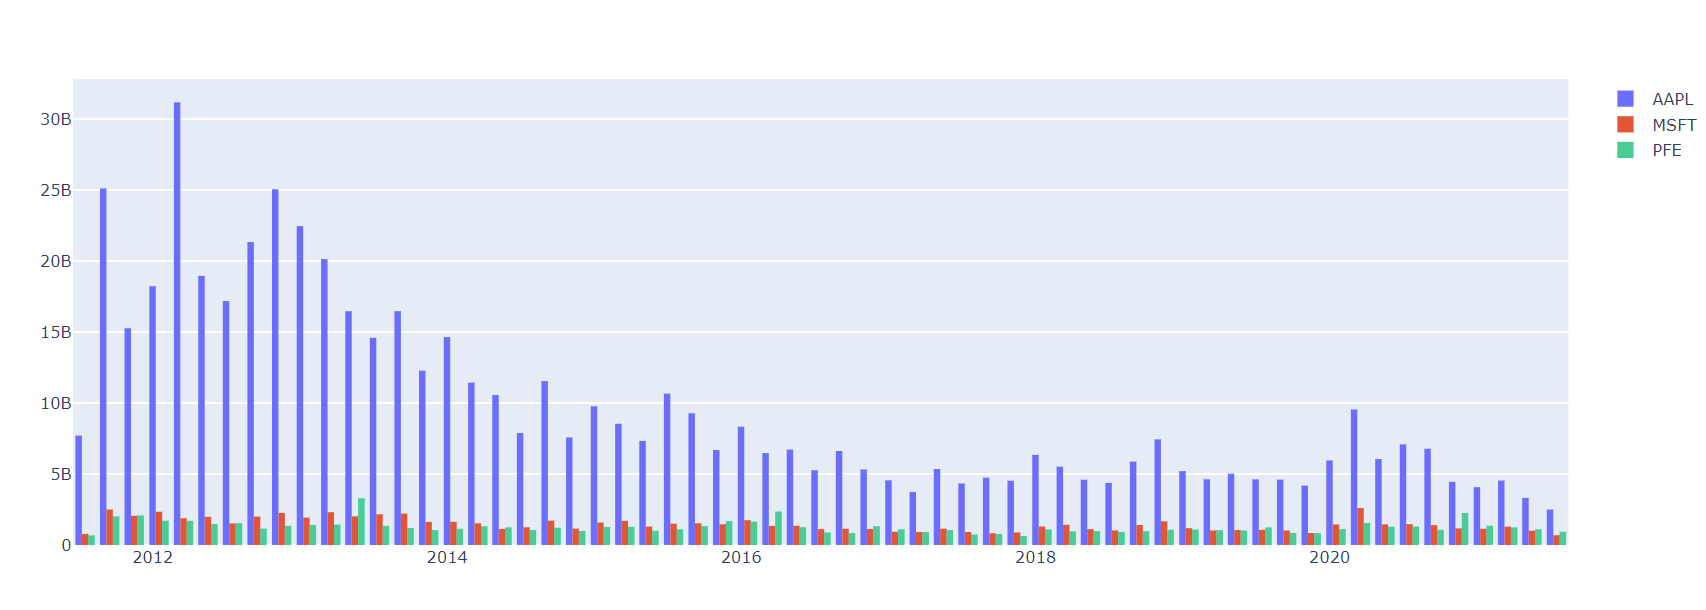